In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sqlalchemy import create_engine
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler,LabelEncoder, MaxAbsScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import svm

from __future__ import division
%matplotlib inline

In [4]:
train=pd.read_csv("train3.csv")
train.set_index("Date",inplace=True)
train.sort_index(inplace=True)
pd.to_datetime(train.index)
train.head()

,Trap,weather_station,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,spray,PCAw1,PCAw2,PCAw3,PCAw4,PCAw5
Date,,,,,,,,,,,,,,
2007-05-29,T002,1,0.0,1.0,0.0,0.0,0.0,0.0,1000,-1.322259,-1.422859,-0.539961,-0.364724,0.243278
2007-05-29,T002,1,0.0,0.0,1.0,0.0,0.0,0.0,1000,-1.322259,-1.422859,-0.539961,-0.364724,0.243278
2007-05-29,T007,1,0.0,0.0,1.0,0.0,0.0,0.0,1000,-1.322259,-1.422859,-0.539961,-0.364724,0.243278
2007-05-29,T015,1,0.0,1.0,0.0,0.0,0.0,0.0,1000,-1.322259,-1.422859,-0.539961,-0.364724,0.243278
2007-05-29,T015,1,0.0,0.0,1.0,0.0,0.0,0.0,1000,-1.322259,-1.422859,-0.539961,-0.364724,0.243278


In [8]:
train2=pd.read_csv("train2.csv")
train2.set_index("Date",inplace=True)
train2.sort_index(inplace=True)
pd.to_datetime(train2.index)
target=train2["WnvPresent"]

In [10]:
test=pd.read_csv("test3.csv")
test.set_index("Date",inplace=True)
test.sort_index(inplace=True)
pd.to_datetime(test.index)
test.head()

,Trap,weather_station,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,spray,PCAw1,PCAw2,PCAw3,PCAw4,PCAw5
Date,,,,,,,,,,,,,,,
2008-06-11,T002,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1000,-1.243057,0.222085,-0.979018,-0.159736,-0.0776
2008-06-11,T002,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1000,-1.243057,0.222085,-0.979018,-0.159736,-0.0776
2008-06-11,T002,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000,-1.243057,0.222085,-0.979018,-0.159736,-0.0776
2008-06-11,T002,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1000,-1.243057,0.222085,-0.979018,-0.159736,-0.0776
2008-06-11,T002,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1000,-1.243057,0.222085,-0.979018,-0.159736,-0.0776


In [13]:
lb=LabelEncoder()
lb.fit(train["Trap"])
train["Trap"]=lb.transform(train["Trap"])

In [16]:
std=StandardScaler()
std.fit(train)
train_scal=pd.DataFrame(std.transform(train),columns=train.columns.tolist())
train_scal.head()

,Trap,weather_station,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,spray,PCAw1,PCAw2,PCAw3,PCAw4,PCAw5
0,-1.751471,-1.478366,-0.587976,1.100390,-0.593987,-0.090848,-0.023905,-0.146925,-0.281953,0.076203,-0.78964,-0.692841,-0.30493,0.257538
1,-1.751471,-1.478366,-0.587976,-0.908769,1.683540,-0.090848,-0.023905,-0.146925,-0.281953,0.076203,-0.78964,-0.692841,-0.30493,0.257538
2,-1.627948,-1.478366,-0.587976,-0.908769,1.683540,-0.090848,-0.023905,-0.146925,-0.281953,0.076203,-0.78964,-0.692841,-0.30493,0.257538
3,-1.455016,-1.478366,-0.587976,1.100390,-0.593987,-0.090848,-0.023905,-0.146925,-0.281953,0.076203,-0.78964,-0.692841,-0.30493,0.257538
4,-1.455016,-1.478366,-0.587976,-0.908769,1.683540,-0.090848,-0.023905,-0.146925,-0.281953,0.076203,-0.78964,-0.692841,-0.30493,0.257538


In [78]:
lb=LabelEncoder()
lb.fit(test["Trap"])
test["Trap"]=lb.transform(test["Trap"])

std=StandardScaler()
std.fit(test)
test_scal=pd.DataFrame(std.transform(test),columns=test.columns.tolist())
test_scal.head()

,Trap,weather_station,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,spray,PCAw1,PCAw2,PCAw3,PCAw4,PCAw5
0,-1.676724,-1.511628,-0.377732,2.563523,-0.379944,-0.375261,-0.375142,-0.375201,-0.375112,-0.43622,-0.060383,0.462774,-0.908721,-0.079402,-0.242015
1,-1.676724,-1.511628,-0.377732,-0.390088,2.631970,-0.375261,-0.375142,-0.375201,-0.375112,-0.43622,-0.060383,0.462774,-0.908721,-0.079402,-0.242015
2,-1.676724,-1.511628,2.647378,-0.390088,-0.379944,-0.375261,-0.375142,-0.375201,-0.375112,-0.43622,-0.060383,0.462774,-0.908721,-0.079402,-0.242015
3,-1.676724,-1.511628,-0.377732,-0.390088,-0.379944,2.664811,-0.375142,-0.375201,-0.375112,-0.43622,-0.060383,0.462774,-0.908721,-0.079402,-0.242015
4,-1.676724,-1.511628,-0.377732,-0.390088,-0.379944,-0.375261,-0.375142,2.665235,-0.375112,-0.43622,-0.060383,0.462774,-0.908721,-0.079402,-0.242015


In [52]:
print "Baseline", 1-sum(target)/target.count()

Baseline 0.947553778793


In [47]:
X_train,X_test,y_train, y_test=train_test_split(train_scal,target,test_size=0.40,random_state=73)

# with trap encoding

In [55]:
# Logistic regression

logit=LogisticRegression()
logit.fit(X_train,y_train)
prediction=logit.predict(X_test)

print "Logit:"
print "score:", logit.score
print "Accuracity:",metrics.accuracy_score(y_test,prediction)
print "number of 1 prediction %d, number of 1 y_test %d"%(sum(prediction),sum(y_test))
print "------\n"



Logit:
score: <bound method LogisticRegression.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
Accuracity: 0.946466809422
number of 1 prediction 0, number of 1 y_test 225
------



In [56]:
# Naive bays
Mx=MinMaxScaler()
Mx.fit(train)
train_scal_2=pd.DataFrame(Mx.transform(train),columns=train.columns.tolist())
train_scal_2.head()

X_train2,X_test2,y_train2, y_test2=train_test_split(train_scal_2,target,test_size=0.33,random_state=73)



clf_ber=BernoulliNB()
clf_ber.fit(X_train2,y_train2)
prediction=clf_ber.predict(X_test2)

print "Bernouilli:"
print "score:", clf_ber.score
print "Accuracity:",metrics.accuracy_score(y_test2,prediction)
print "number of 1 prediction %d, number of 1 y_test %d"%(sum(prediction),sum(y_test))
print "------\n"

clf_nb=MultinomialNB()
clf_nb.fit(X_train2,y_train2)
prediction=clf_nb.predict(X_test2)

print "MultinomialNB:"
print "score:", clf_nb.score
print "Accuracity:",metrics.accuracy_score(y_test2,prediction)
print "number of 1 prediction %d, number of 1 y_test %d"%(sum(prediction),sum(y_test))
print "------\n"


Bernouilli:
score: <bound method BernoulliNB.score of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)>
Accuracity: 0.944909143352
number of 1 prediction 0, number of 1 y_test 225
------

MultinomialNB:
score: <bound method MultinomialNB.score of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>
Accuracity: 0.944909143352
number of 1 prediction 0, number of 1 y_test 225
------



In [57]:
# SVM

svc=svm.SVC()
svc.fit(X_train,y_train)
prediction=svc.predict(X_test)

print "SMM:"
print "score:", svc.score
print "Accuracity:",metrics.accuracy_score(y_test,prediction)
print "number of 1 prediction %d, number of 1 y_test %d"%(sum(prediction),sum(y_test))
print "------\n"

SMM:
score: <bound method SVC.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>
Accuracity: 0.946466809422
number of 1 prediction 0, number of 1 y_test 225
------



min Bagging:0.0556724678994for n-estimator:13
min Adabost:0.0467146893928for n-estimator:12
min ExtraTree:0.0679513573007for n-estimator:13
min RandomForest:0.0555920399237for n-estimator:13


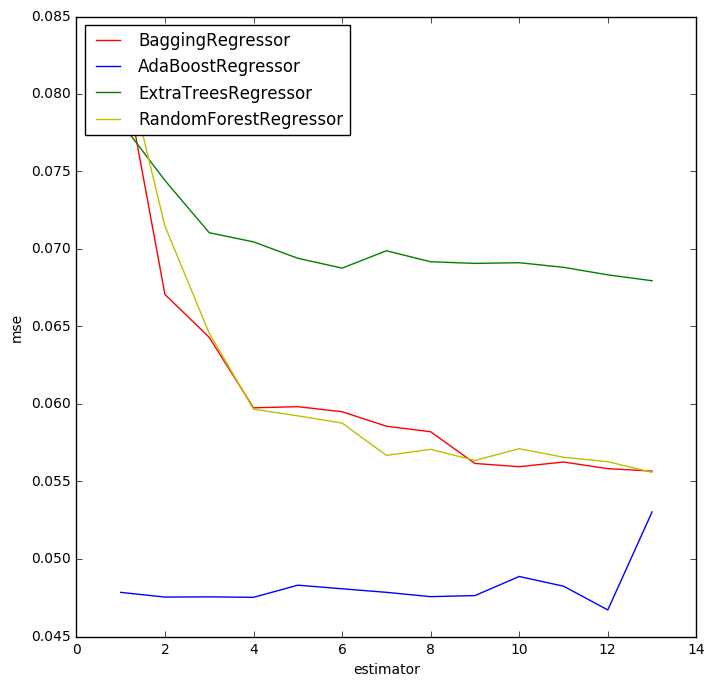

In [59]:
# Ensemble

estimators=range(1,train_scal.shape[1])

def get_mean_mse(model,n):
    ensemble=model(n_estimators=n)
    score=cross_val_score(ensemble,X_train,y_train, cv=5,scoring="neg_mean_squared_error")
    return np.mean(score)

Bagging=[]
Adaboost=[]
ExtraTree=[]
RandomForest=[]


for i in estimators:
    Bagging.append(get_mean_mse(BaggingRegressor,i))
    Adaboost.append(get_mean_mse(AdaBoostRegressor,i))
    ExtraTree.append(get_mean_mse(ExtraTreesRegressor,i))
    RandomForest.append(get_mean_mse(RandomForestRegressor,i))

print("min Bagging:"+ str(min(np.absolute(Bagging)))+ "for n-estimator:" + \
str(estimators[Bagging.index(-min(np.absolute(Bagging)))]))

print("min Adabost:"+ str(min(np.absolute(Adaboost)))+ "for n-estimator:" + \
str(estimators[Adaboost.index(-min(np.absolute(Adaboost)))]))

print("min ExtraTree:"+ str(min(np.absolute(ExtraTree)))+ "for n-estimator:" + \
str(estimators[ExtraTree.index(-min(np.absolute(ExtraTree)))]))

print("min RandomForest:"+ str(min(np.absolute(RandomForest)))+ "for n-estimator:" + \
str(estimators[RandomForest.index(-min(np.absolute(RandomForest)))]))

plt.figure(figsize=(8,8))
plt.plot(estimators,np.absolute(Bagging),label="BaggingRegressor",c="r")
plt.plot(estimators,np.absolute(Adaboost),label="AdaBoostRegressor",c="b")
plt.plot(estimators,np.absolute(ExtraTree),label="ExtraTreesRegressor",c="g")
plt.plot(estimators,np.absolute(RandomForest),label="RandomForestRegressor",c="y")
plt.xlabel("estimator")
plt.ylabel("mse")
plt.legend(loc=2)
plt.show()

 mse: 0.0495898352033
 r2 score: 0.0212671882675


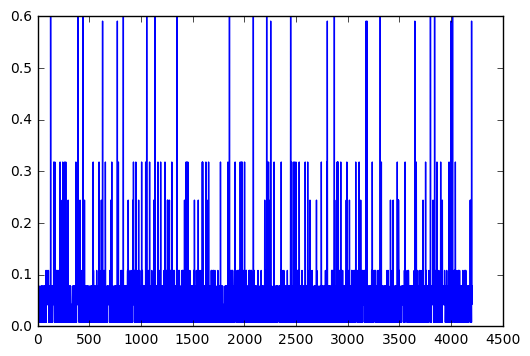

accuracity: 0.930049964311
number of 1 prediction 129, number of 1 y_test 225


In [77]:
ad = AdaBoostRegressor(n_estimators=2)

model=ad.fit(X_train,y_train)
prediction=model.predict(X_test)

print " mse:", metrics.mean_squared_error(y_test,prediction)
print " r2 score:", metrics.r2_score(y_test,prediction)
plt.plot(range(len(prediction)),prediction)
plt.show()

prediction_final=pd.DataFrame(data=prediction)
prediction_final.columns=["prediction"]


prediction_final["result"]=prediction_final["prediction"].apply(lambda x: 1 if x>0.2 else 0)
del prediction_final["prediction"]

print "accuracity:", metrics.accuracy_score(y_test,prediction_final)
print "number of 1 prediction %d, number of 1 y_test %d"%(prediction_final.sum(),sum(y_test))

___

# Apply on test set.

- fit on train_scal and adaboost
- predict on test_scal
- send to kaggle